In [1]:
from generate import generatejson
from graph import *

Primeira parte do desafio é escolher aleatoriamente uma página da Wikipédia e encontrar os links que estão vizinhos a essa publicação. Assim será escolhido aleatoriamente um vizinho e repetimos o processo.

Isso tudo será feito na função `generatejson` que irá gerar um arquivo .json com a rede gerada. Caso queira criar um arquivo de rede gerada aleatoriamente então delete o arquivo `data.json` e execute a célula abaixo.

In [2]:
R = generatejson(500)

0 Paul Dirac 126
1 Martinus J. G. Veltman 64
2 Julian Schwinger 74
3 Anomalous magnetic dipole moment 61
4 Klein–Nishina formula 41
5 Quantum electrodynamics 224
6 Anomalous magnetic dipole moment 61
7 Neutralino 167
8 Lepton 213
9 Diquark 158
10 Bottom quark 180
11 Omega baryon 167
12 Plasmon 178
13 Gaugino 228
14 Ernest Rutherford 39
15 Niels Bohr 97
16 William Crookes 27
17 JSTOR (identifier) 9
18 Wayback Machine 4
19 Doi (identifier) 6
20 Hdl (identifier) 2
22 Hugh David Politzer 64
23 Paul Dirac 126
24 Boson 237
25 John Iliopoulos 25
26 Muon 203
27 Quarkonium 171
28 Dilaton 198
29 Ghost (physics) 206
30 String theory 85
31 Magnetic monopole 197
32 Molecule 180
33 Schrödinger equation 354
34 Quantum gravity 160
35 Weak hypercharge 65
36 Next-to-Minimal Supersymmetric Standard Model 106
37 Loop quantum cosmology 14
38 Quantum dynamics 39
39 Wave function 94
40 Interference (wave propagation) 67
41 Quantum simulator 137
42 Amplitude amplification 125
43 Ultracold atom 129
44 Bernstei

A partir desses dados vamos construir a nossa rede, utilizando a função `read_json_file` que está no arquivo `graph.py`.

In [5]:
G = nx.DiGraph()
G.add_edges_from([i for i in R])

In [8]:
Rede = read_json_file('data1.json',1)

Assim faremos a primeira imagem da rede utilizando a biblioteca `networkx` do python. Assim poderemos ter uma noção de sua estrutura. 

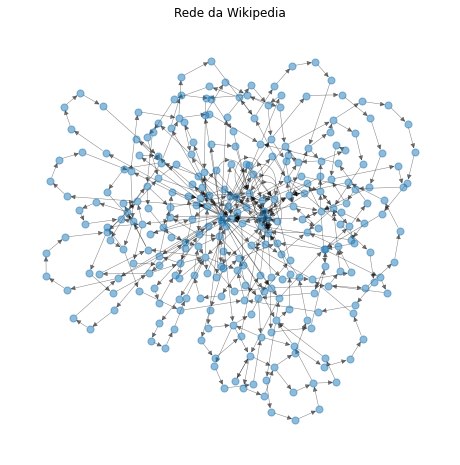

In [6]:
draw_graph(G)

Percebe-se que essa rede é direcionada, os links da Wikipédia podem apontar para outros pondendo ou não apontarem de volta para o nó raiz. Na imagem percebemos que os nós que têm menos ligações (os que estão na borda da rede) apresentam ligações apontando para outros links e poucas recebendo. Isso é esperado pois quanto mais específico o post no site menos ele recebe ligações e mais ele aponta para algum assunto. Quanto mais adentramos para o centro da rede mais importante os nós são para redes pois esses nós são assuntos mais gerais que englobam ou são base para assuntos mais específicos e por isso tem uma densidade maior de ligações.

In [10]:
s1,s2 = degree(Rede,'in')
for i,j in zip(s1[:10],s2[:10]):
    print(i,j)

Doi (identifier) 346
ArXiv (identifier) 320
Bibcode (identifier) 315
Electron 263
Photon 227
PMID (identifier) 206
Particle physics 200
Wave–particle duality 178
Graviton 169
Molecule 159


A partir desses dados vamos ver qual é a distribuição de graus tanto de entrada quanto de saída. Percebe-se que em ambos os gráficos temos um grande número de sítios com poucos graus de entrada e de saída e poucos com altos graus. Além disso quando falamos de graus de saída percebe-se o seu máximo é em valores próximos de 1 a 3, ou seja, temos uma grande quantidade de posts específicos que apontam para outros, comprovando a análise da imagem da rede. No caso de graus de entrada percebe-se que o máximo é em 0, ou seja, como grande parte dos post é específico, eles recebem poucas menções em outros posts.

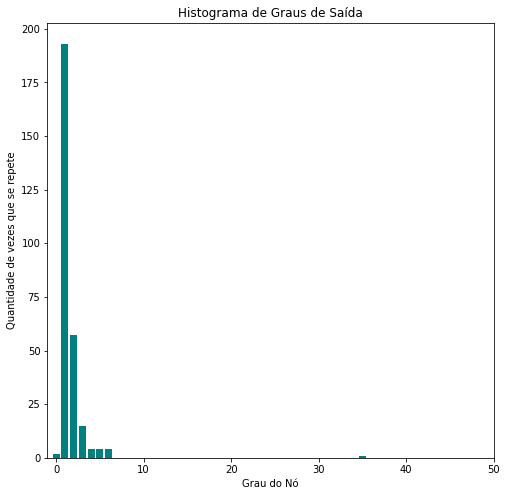

In [8]:
figure_hist(G,'out','Histograma de Graus de Saída')

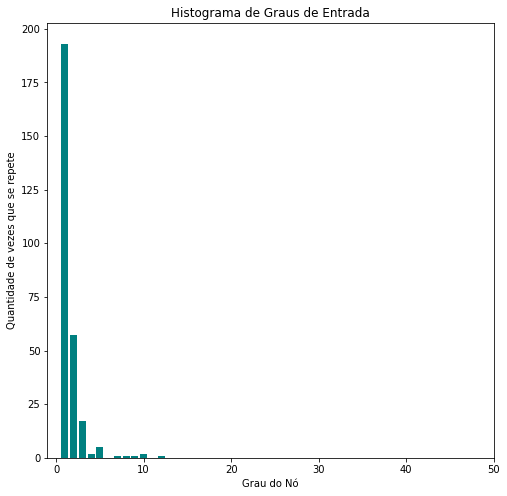

In [9]:
figure_hist(G,'in','Histograma de Graus de Entrada')

In [13]:
metrics(Rede)

Densidade da rede é: 0.08670941883767536
Rede pouco densa, portanto encontramos um diâmetro infinto
Agrupamento da rede é de: 0.36191169871397355
Reciprocidade da rede é de: 0.0


Podemos perceber que a rede é pouco densa, pois temos poucos links. Por causa disso temos um problema que não conseguimos calcular o menor caminho médio ou sua densidade, pois muitos nós (que são posts específicos) não recebem ligações e isso faz com que não se consiga chegar neles. Essa característica da rede leva a um agrupamento baixo, pois os posts mais amplos são mais agrupados, por sua vez os mais específicos não. Por fim, vemos que a reciprocidade é zero, pois apenas as postagens mais amplas que conseguem referenciar umas as outras.

Por fim, vamos salvar a rede em um arquivo `.gpickle`.

In [4]:
save_graph(Rede)

In [6]:
a = [(1,2),(3,4)]

In [7]:
len(a)

2